_Author: Guoqing Wang (guoqing.wang@nasa.gov), OB.DAAC Scientist, NASA GSFC; SSAI_

**<ins>Download, read, and visualize level-2 ocean color data</ins>**

This tutorial shows an example of downloading, reading, and plot OB.DAAC standard level 2 ocean color file.

In [48]:
# !pip install cartopy
# !pip install netcdf4

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
from matplotlib import pyplot as plt
import pandas as pd

import numpy as np
import urllib.request
import netCDF4 as nc
import cartopy  #!pip install cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

**1. Download file**
<br>In this example, I will use the MODIS_AQUA L2 OC file on April 30, 2023 (AQUA_MODIS.20221007T175001.L2.OC.nc).

- Specify your **appkey**
<br>[Generate appkey for your Earthdata login credentials](https://oceandata.sci.gsfc.nasa.gov/appkey/) and update the variable "key" correspondingly.

In [38]:
key = 'abcd1234' # paste your appkey here.
filename = 'AQUA_MODIS.20221007T175001.L2.OC.nc' # put here the file name to download
urls = r'https://oceandata.sci.gsfc.nasa.gov/ob/getfile/%s?appkey=%s'%(filename, key)

urllib.request.urlretrieve(urls, filename) # download the file to the current path

('AQUA_MODIS.20221007T175001.L2.OC.nc',
 <http.client.HTTPMessage at 0x7f3293265180>)

**2. Loading the Level-2 Dataset** <br>
NASA ocean color data are stored in NetCDF files. They can be read with a few different Python modules. The most popular are netCDF4 and gdal. For this script we’ll focus on netCDF4.<br>
Loading a dataset is simple, just pass a NetCDF file path to netCDF4.Dataset().

In [39]:
# open file and print the metadata
f = nc.Dataset(filename, 'r')

A NetCDF file consists of three fundamental components: metadata, dimensions, and variables. Variables encompass both metadata and data. The netCDF4 library enables us to retrieve the metadata and data linked to a NetCDF file.

**3. Retrieve Metadata**
<br>When we print the dataset f, it provides details about the variables present in the file as well as the groups of variables.

In [40]:
print (f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: MODISA Level-2 Data
    product_name: AQUA_MODIS.20221007T175001.L2.OC.nc
    processing_version: R2022.0
    equatorCrossingLongitude: 107.35993
    orbit_number: 108659
    history: l2gen par=/data19/sdpsoper/vdc/vpu38/workbuf/A2022280175000.L1B_LAC.param metafile=AQUA_MODIS.20221007T175001.L2.OC.nc.meta
    instrument: MODIS
    platform: Aqua
    Conventions: CF-1.6 ACDD-1.3
    license: https://science.nasa.gov/earth-science/earth-science-data/data-information-policy/
    naming_authority: gov.nasa.gsfc.sci.oceandata
    id: R2022.0/L2/AQUA_MODIS.20221007T175001.L2.OC.nc
    date_created: 2022-11-29T16:08:55.000Z
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    keywords: Earth Science > Oceans > Ocean Optics > Ocean Color
    standard_name_vocabulary: CF Standard Name Table v36
    institution: NASA Goddard Space Flight Center, Ocean Ecology Labo

Above you can see information for the file format, data source, data version, citation, dimensions, and variables. In L2 ocean color data, the variables are put in different groups, the ones that we are interested in, such as Rrs, Chla, etc. are in "geophysical_data", and lat, lon are in "navigation_data"

In [41]:
# print grouped variables
print(f.groups.keys())

dict_keys(['sensor_band_parameters', 'scan_line_attributes', 'geophysical_data', 'navigation_data', 'processing_control'])


**4. Dimensions** 
<br>Accessing dimensions is akin to accessing file metadata. Each dimension is stored as a dimension class that holds relevant information. To retrieve metadata for all dimensions, one can loop through all the available dimensions, as demonstrated below.

In [42]:
for dim in f.dimensions.values():
    print(dim)
    
# Individual dimensions are accessed like so: f.dimensions['x'].

<class 'netCDF4._netCDF4.Dimension'>: name = 'number_of_lines', size = 2030
<class 'netCDF4._netCDF4.Dimension'>: name = 'pixels_per_line', size = 1354
<class 'netCDF4._netCDF4.Dimension'>: name = 'bands_per_pixel', size = 16
<class 'netCDF4._netCDF4.Dimension'>: name = 'number_of_reflectance_location_values', size = 10
<class 'netCDF4._netCDF4.Dimension'>: name = 'pixel_control_points', size = 1354
<class 'netCDF4._netCDF4.Dimension'>: name = 'number_of_bands', size = 24
<class 'netCDF4._netCDF4.Dimension'>: name = 'number_of_reflective_bands', size = 16


**5. Variable Metadata** <br>
Access variable metadata in the groups of "geophysical_data" and "navigation_data". 

In [43]:
#print(f.groups['geophysical_data'].variables)
# if you just want to see the variable names, use the following code
print(f.groups['geophysical_data'].variables.keys())

dict_keys(['aot_869', 'angstrom', 'Rrs_412', 'Rrs_443', 'Rrs_469', 'Rrs_488', 'Rrs_531', 'Rrs_547', 'Rrs_555', 'Rrs_645', 'Rrs_667', 'Rrs_678', 'chlor_a', 'Kd_490', 'pic', 'poc', 'ipar', 'nflh', 'par', 'l2_flags'])


**6. Access Data Values**
<br>The actual precipitation data values are accessed by array indexing, and a numpy array is returned. All variable data is returned as follows:

In [44]:
# metadata of variable: chlor_a
print(f.groups['geophysical_data'].variables['chlor_a'])

<class 'netCDF4._netCDF4.Variable'>
float32 chlor_a(number_of_lines, pixels_per_line)
    long_name: Chlorophyll Concentration, OCI Algorithm
    units: mg m^-3
    standard_name: mass_concentration_of_chlorophyll_in_sea_water
    _FillValue: -32767.0
    valid_min: 0.001
    valid_max: 100.0
    reference: Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans: A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.
path = /geophysical_data
unlimited dimensions: 
current shape = (2030, 1354)
filling on


In [45]:
# value of chlor_a
chlor_a = f.groups['geophysical_data'].variables['chlor_a'][:]
print(chlor_a)

[[0.01556490734219551 0.01509102713316679 0.015974054113030434 ... --
  0.20154109597206116 0.18869897723197937]
 [0.01652761548757553 0.015768131241202354 0.015580163337290287 ... -- --
  --]
 [0.015834644436836243 0.01573110558092594 0.01611599512398243 ... -- --
  --]
 ...
 [-- 2.553077220916748 1.7888909578323364 ... -- -- --]
 [-- 4.523899078369141 3.566077470779419 ... -- -- --]
 [-- 2.478635549545288 2.4827561378479004 ... -- -- --]]


In [46]:
# read information of lat, lon
print(f.groups['navigation_data'].variables.keys())
lat = f.groups['navigation_data'].variables['latitude'][:]
lon = f.groups['navigation_data'].variables['longitude'][:]
print(lat.shape)
print(lon.shape)
print(chlor_a.shape)
chlor = np.log10(chlor_a)


dict_keys(['longitude', 'latitude', 'cntl_pt_cols', 'cntl_pt_rows', 'tilt'])
(2030, 1354)
(2030, 1354)
(2030, 1354)


**7. Visualization and mapping**
<br>Here, we use cartopy for basemap creation and matplotlib to plot data onto the created map.
The combination of Matplotlib and Cartopy provides a powerful toolkit for creating geospatial visualizations.

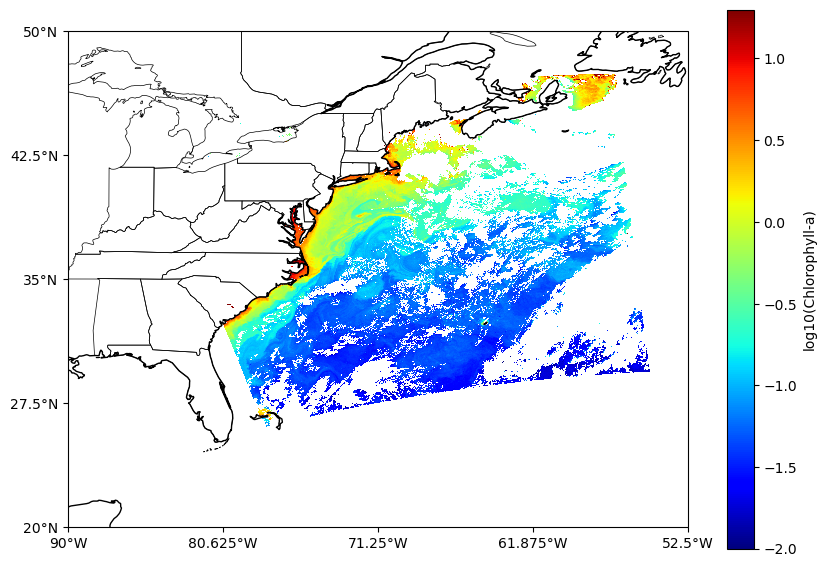

In [47]:
# Plot Chlor_a data
fig = plt.figure(figsize=(10, 7))
map_projection = cartopy.crs.PlateCarree()
ax = plt.axes(projection=map_projection)

im = ax.pcolormesh(lon, lat,np.squeeze(chlor),cmap = 'jet', vmin=-2, vmax=1.3)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES, linewidth=0.5)

ax.set_xticks(np.linspace(-90, -52.5, 5), crs=map_projection)
ax.set_yticks(np.linspace(20, 50, 5), crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.colorbar(im, label='log10(Chlorophyll-a)',)